In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [84]:
#Importing and downloading essential files
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to /Users/adwait/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adwait/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
df = pd.read_csv('Restaurant_Reviews.csv')

In [86]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
#Using pandas profiling tool for a starting EDA
pandas_profiling.ProfileReport(df)

In [87]:
#Checking the dimensions of the dataset
df.shape

(1000, 2)

In [88]:
#Column names
df.columns

Index(['Review', 'Liked'], dtype='object')

In [89]:
#To check whether 1 stands for positive or negative
df['Review'][df['Liked'] == 1].head()

0                             Wow... Loved this place.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
8                            The fries were great too.
9                                       A great touch.
Name: Review, dtype: object

In [15]:
# 1 stands for positive reviews and 0 stands for negative reviews

In [90]:
#To check the distribution of positive and negative reviews
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [91]:
#Thus there are 500 positive reviews and 500 negative reviews.
#Hence the data is not imbalanced i.e. it is not tending towards a particular sentiment
#Checking missing values
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [92]:
#There are no missing values!
#Data cleaning
#Removing @ in the Review column

df['clean_review'] = df['Review'].apply(lambda x : ' '.join([word for word in x.split() if not word.startswith('@')]))

In [93]:
df.head()

,Review,Liked,clean_review
0,Wow... Loved this place.,1,Wow... Loved this place.
1,Crust is not good.,0,Crust is not good.
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...


In [94]:
#Removing numbers from the text
df['clean_review'] = df['Review'].apply(lambda x : ' '.join([word for word in x.split() if not word == '\d*']))

In [95]:
df.head()

,Review,Liked,clean_review
0,Wow... Loved this place.,1,Wow... Loved this place.
1,Crust is not good.,0,Crust is not good.
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...


In [96]:
#Removing 'hmmm' and it's variants
df['clean_review'] = df['Review'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+']))

In [97]:
df.head()

,Review,Liked,clean_review
0,Wow... Loved this place.,1,Wow... Loved this place.
1,Crust is not good.,0,Crust is not good.
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...


In [98]:
import unidecode

In [99]:
#Remove greek or unknown characters if any
df['clean_review'] = df['Review'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

In [100]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [107]:
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
df['clean_review'] = df['clean_review'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [108]:
df.head()

,Review,Liked,clean_review
0,Wow... Loved this place.,1,Wow... Loved this place.
1,Crust is not good.,0,Crust is not good.
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...


In [109]:
df['clean_review'] = df['clean_review'].str.replace("[^a-zA-Z#]", " ")

In [110]:
df.head()

,Review,Liked,clean_review
0,Wow... Loved this place.,1,Wow Loved this place
1,Crust is not good.,0,Crust is not good
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...


In [114]:
#Removing stop words
df['clean_review'] = df['clean_review'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [115]:
df.head()

,Review,Liked,clean_review
0,Wow... Loved this place.,1,Wow Loved place
1,Crust is not good.,0,Crust good
2,Not tasty and the texture was just nasty.,0,Not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,The selection menu great prices


In [116]:
df['Count(#)'] = df['clean_review'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [119]:
df.head()

,Review,Liked,clean_review,Count(#)
0,Wow... Loved this place.,1,Wow Loved place,
1,Crust is not good.,0,Crust good,
2,Not tasty and the texture was just nasty.,0,Not tasty texture nasty,
3,Stopped by during the late May bank holiday of...,1,Stopped late May bank holiday Rick Steve recom...,
4,The selection on the menu was great and so wer...,1,The selection menu great prices,


In [121]:
#There are no hashtags
df.drop('Count(#)',inplace=True,axis = 1)

In [122]:
df.head()

,Review,Liked,clean_review
0,Wow... Loved this place.,1,Wow Loved place
1,Crust is not good.,0,Crust good
2,Not tasty and the texture was just nasty.,0,Not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,The selection menu great prices


In [125]:
#Stemming and Lemmatizing
lemmatizer = WordNetLemmatizer()
df['clean_review'] = df['clean_review'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

ps = PorterStemmer()
df['clean_review'] = df['clean_review'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [126]:
df.head()

,Review,Liked,clean_review
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,the select menu great price


In [127]:
#Tokenization
corpus = []
for i in range(0,1000):
    tweet = df['clean_review'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [word for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [130]:
len(corpus)

1000

In [131]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Normal words


(-0.5, 799.5, 499.5, -0.5)

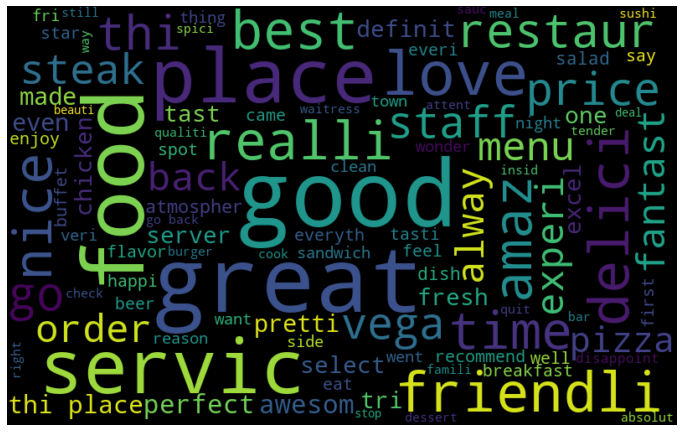

In [132]:
#Top 100 frequently occuring positive review words
normal_words = ' '.join([word for word in df['clean_review'][df['Liked'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

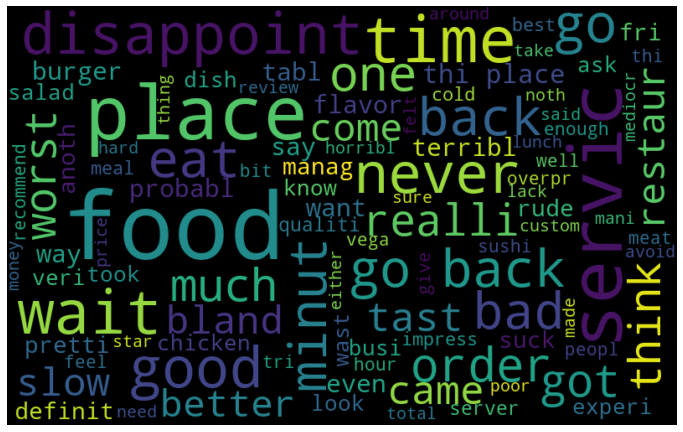

In [133]:
#Top 100 frequently occuring negative review words
normal_words = ' '.join([word for word in df['clean_review'][df['Liked'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [134]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'thi place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care le interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'thi hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'thi like final blow',
 'found

In [139]:
#Using bag of words model:-
from sklearn.feature_extraction.text import CountVectorizer  
cv = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')  
X = cv.fit_transform(corpus).toarray()
z = pd.DataFrame(X)

In [141]:
#Using TF-IDF method
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()

In [199]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [143]:
#Preparing the test array
Y = df.iloc[:,1].values

In [146]:
Y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [156]:
#Using the 4 step model process
#1 - Importing the model class
#Using K - nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

In [157]:
#2 - Instantiator
knn = KNeighborsClassifier(n_neighbors=1)

In [158]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [164]:
#3 - Fitting the model
k = knn.fit(X,Y)

In [165]:
#4 - Make predictions
#Model Evaluation - training and testing on the same dataset
k_pred = k.predict(X)

In [166]:
len(k_pred)

1000

In [168]:
from sklearn import metrics

print(metrics.accuracy_score(k_pred,Y))

0.99


In [169]:
#Here the training accuracy is 0.99 which is highly unrealistic on the unknown test dataset
##Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [170]:
#k-nn model
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
model_knn = kn.fit(X_train,Y_train)
k_pred = model_knn.predict(X_test)

In [171]:
#Getting the accuracy of the model
from sklearn import metrics
print(metrics.accuracy_score(Y_test,k_pred))

0.61


In [172]:
#Tuning the model
#With k = 2
kn = KNeighborsClassifier(n_neighbors=2)
model_knn = kn.fit(X_train,Y_train)
k_pred = model_knn.predict(X_test)

In [173]:
print(metrics.accuracy_score(Y_test,k_pred))

0.66


In [175]:
#With k = 1
kn = KNeighborsClassifier(n_neighbors=1)
model_knn = kn.fit(X_train,Y_train)
k_pred = model_knn.predict(X_test)
print(metrics.accuracy_score(Y_test,k_pred)*100)
#Thus the k-nn model gives an accuracy 70% with k = 1

70.0


In [186]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

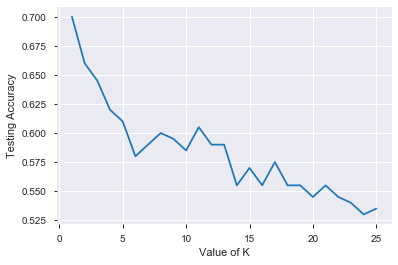

In [188]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

In [216]:
#K- fold cross validation using K = 10 and k = 2 for KNN
#from sklearn.model_selection import cross_val_score
#knn = KNeighborsClassifier(n_neighbors=2)
#scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
#print(scores)
#print(scores.mean()*100)

k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.675, 0.631, 0.666, 0.637, 0.646, 0.617, 0.639, 0.6210000000000001, 0.6299999999999999, 0.597, 0.6050000000000001, 0.5800000000000001, 0.6010000000000001, 0.576, 0.5880000000000001, 0.579, 0.5820000000000001, 0.5690000000000002, 0.5750000000000001, 0.5630000000000001, 0.569, 0.559, 0.562, 0.555, 0.5650000000000001, 0.55, 0.5610000000000002, 0.5509999999999999, 0.554, 0.546]


Text(0, 0.5, 'Cross-Validated Accuracy')

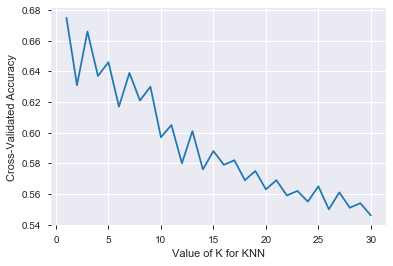

In [218]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [177]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,k_pred)
print(cm)

[[78 19]
 [41 62]]


In [192]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_logreg = lr.fit(X_train,Y_train)
logreg_pred = model_logreg.predict(X_test)
print(metrics.accuracy_score(Y_test,logreg_pred)*100)
log_cm = metrics.confusion_matrix(Y_test,logreg_pred)
print(log_cm)

73.5
[[81 16]
 [37 66]]


In [236]:
#Logistic Regression using 10 fold - cross validation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_val_score(lr, X, Y, cv=10, scoring='accuracy')
print(scores)
s0 = scores.mean()
print(s0)

[0.74 0.79 0.78 0.81 0.69 0.83 0.83 0.8  0.81 0.86]
0.794


In [237]:
#Logistic Regression using 5 fold - cross validation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_val_score(lr, X, Y, cv=5, scoring='accuracy')
print(scores)
s1 = scores.mean()
print(s1)

[0.73  0.765 0.74  0.805 0.825]
0.773


In [238]:
#Logistic Regression using 15 fold - cross validation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_val_score(lr, X, Y, cv=15, scoring='accuracy')
print(scores)
s2 = scores.mean()
print(s2)

[0.69117647 0.75       0.83823529 0.79411765 0.76470588 0.83333333
 0.6969697  0.77272727 0.81818182 0.78787879 0.81818182 0.77272727
 0.83333333 0.78787879 0.90909091]
0.7912358882947117


In [239]:
#Logistic Regression using 20 fold - cross validation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_val_score(lr, X, Y, cv=20, scoring='accuracy')
print(scores)
s3 = scores.mean()
print(s3)

[0.68 0.76 0.78 0.84 0.84 0.7  0.86 0.84 0.72 0.7  0.82 0.84 0.8  0.82
 0.82 0.76 0.8  0.8  0.82 0.92]
0.7960000000000002


In [235]:
#Taking the average of 4 cross validated accuracies
print((s0 + s1 + s2 + s3)/4)

0.7885589720736781


In [ ]:
#Hence, the Logistic regression model with 10 fold cross validation is the best for logistic regression and it
#is also better than the K-NN classifier.
